# Setup

In [23]:
LOG_PLOT = False
NDAYS=100

In [24]:
%matplotlib notebook
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
import os
from helper import *
from datetime import datetime
from ecdc import ECDC

## ECDC Data

In [25]:
ecdc = ECDC()
df = ecdc.df
print(ecdc.df.dateRep.max())
df.columns


2020-10-26 00:00:00


Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

## DF Subsets

In [26]:
EU = df[df.continentExp=='Europe'].groupby('dateRep', as_index=False).agg({'cases': sum})
AMERICA = df[(df.continentExp=='America')]


<IPython.core.display.Javascript object>


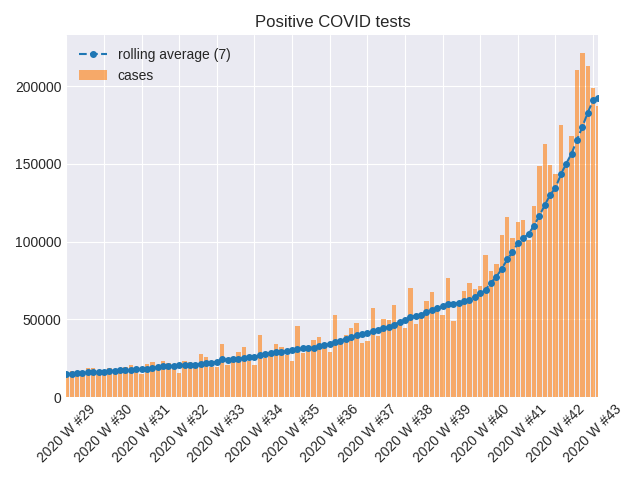

<AxesSubplot:title={'center':'Positive COVID tests'}>

In [27]:
ecdc.plot_selection(EU, ndays=100, roll_days=7, log=False)

# Overview

## Austria, USA, India, ...

<IPython.core.display.Javascript object>


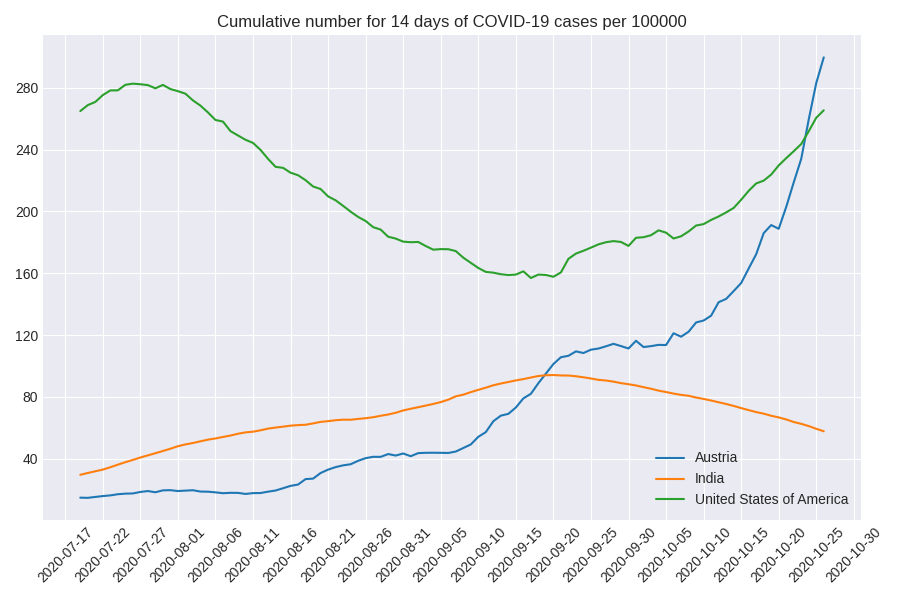

cases                                     \
                           rolling_avg                        last_5_days   
countriesAndTerritories                                                     
United_States_of_America  68795.714286  62978, 72058, 85329, 83056, 59440   
India                     51383.714286  55839, 54366, 53370, 50129, 45148   
Austria                    2425.571429       2355, 2570, 3442, 2989, 2766   

                                 deaths                              \
                            max     sum last_7_days_sum rolling_avg   
countriesAndTerritories                                               
United_States_of_America  85329  225230            5556  793.714286   
India                     97894  119014            4404  629.142857   
Austria                    3442     984              74   10.571429   

                                                          \
                                       last_5_days   max   
countriesAndTerritories                                    
United_States_of_America  1135, 841, 953, 904, 331  4928   
India                      702, 690, 650, 578, 480  2003   
Austria                           13, 17, 15, 6, 6    31   

                         Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
                                                                             latest   
countriesAndTerritories                                                               
United_States_of_America                                         265.485913           
India                                                             57.773034           
Austria                                                          299.736702           

                                      
                                 max  
countriesAndTerritories               
United_States_of_America  282.723242  
India                      94.173835  
Austria                   299.736702

In [28]:
# countries = ['AT', 'IN', 'US', 'UK', 'DE', 'NL', 'FR',  'IT', 'ES','EL' ]
countries = ('AT', 'IN', 'US')
SELECTION =  df[df.geoId.isin(countries)]

ecdc.plot_comparison(countries, log=False, ndays=100)
ecdc.overview(SELECTION)

## Sweden and the world

<IPython.core.display.Javascript object>


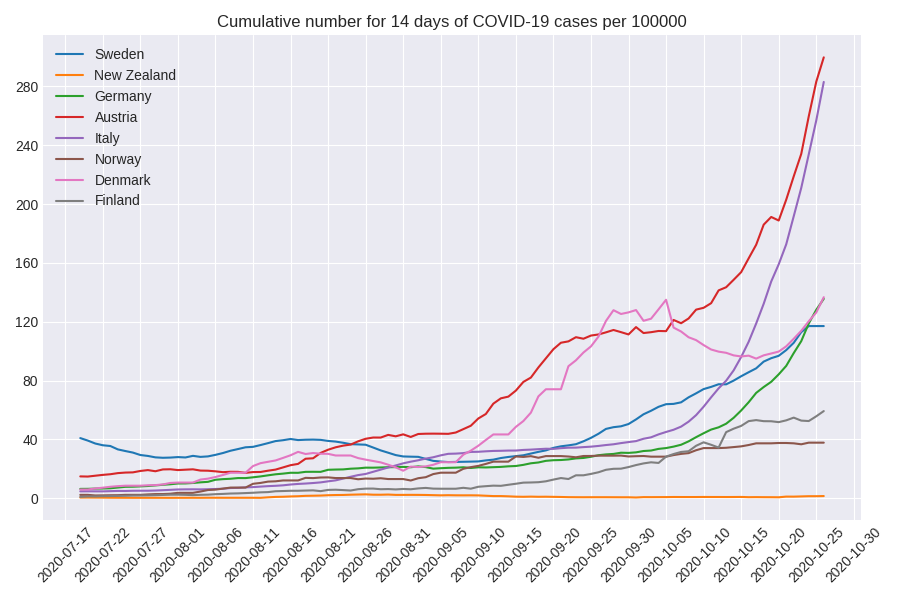

<AxesSubplot:title={'center':'Cumulative number for 14 days of COVID-19 cases per 100000'}>

In [22]:
countries = ('SE', 'NZ','DE','AT','IT','NO','DK','FI',)
ecdc.plot_comparison(countries, log=False, ndays=100)


### World

In [8]:
ecdc.overview(df).head(5)

cases                                     \
                           rolling_avg                        last_5_days   
countriesAndTerritories                                                     
United_States_of_America  67139.000000  58549, 62978, 72058, 85329, 83056   
India                     52894.285714  54044, 55839, 54366, 53370, 50129   
France                    31328.571429  20468, 26676, 41622, 42032, 45422   
Brazil                    22324.714286  23227, 24818, 24858, 30026, 26979   
United_Kingdom            21226.000000  21330, 26687, 21238, 20531, 23012   

                                 deaths                              \
                            max     sum last_7_days_sum rolling_avg   
countriesAndTerritories                                               
United_States_of_America  85329  224899            5610  801.428571   
India                     97894  118534            4503  643.285714   
France                    45422   34645            1253  179.000000   
Brazil                    69074  156903            3228  461.142857   
United_Kingdom            26687   44745            1166  166.571429   

                                                          \
                                       last_5_days   max   
countriesAndTerritories                                    
United_States_of_America  933, 1135, 841, 953, 904  4928   
India                      717, 702, 690, 650, 578  2003   
France                     262, 163, 162, 298, 137  2004   
Brazil                     661, 566, 497, 571, 432  1595   
United_Kingdom             241, 191, 189, 224, 174  1224   

                         Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
                                                                             latest   
countriesAndTerritories                                                               
United_States_of_America                                         260.671362           
India                                                             59.352639           
France                                                           548.587053           
Brazil                                                           141.198142           
United_Kingdom                                                   394.864822           

                                      
                                 max  
countriesAndTerritories               
United_States_of_America  282.723242  
India                      94.173835  
France                    548.587053  
Brazil                    304.320523  
United_Kingdom            394.864822

# Austria

## Plots

<IPython.core.display.Javascript object>


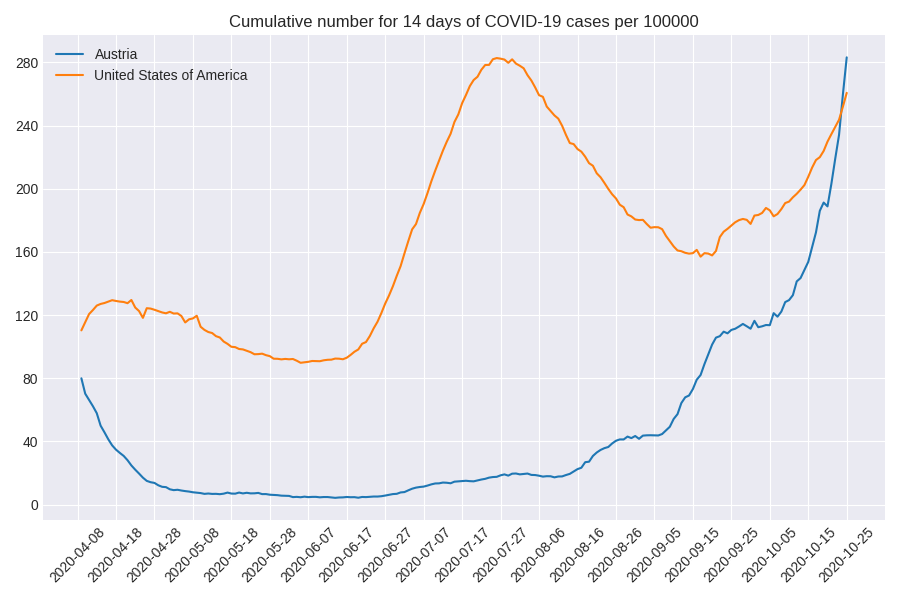

In [15]:
ecdc.plot_comparison(('AT', 'US'), log=LOG_PLOT, ndays=200, roll_days=7);

# India

<IPython.core.display.Javascript object>


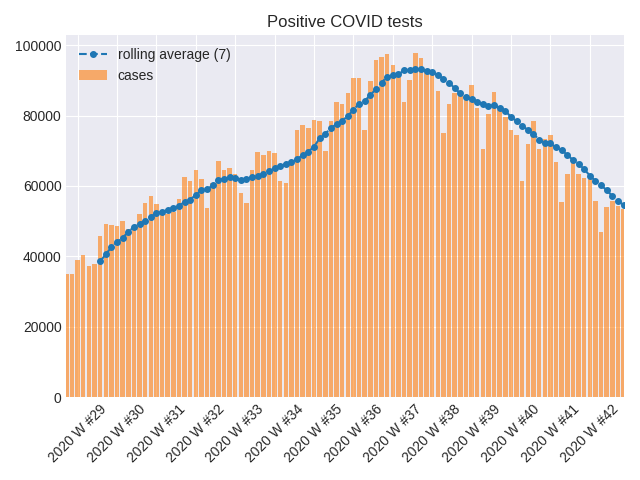

In [60]:
ecdc.plot_country('IN', log=LOG_PLOT,ndays=100, roll_days=7);

# USA

<IPython.core.display.Javascript object>


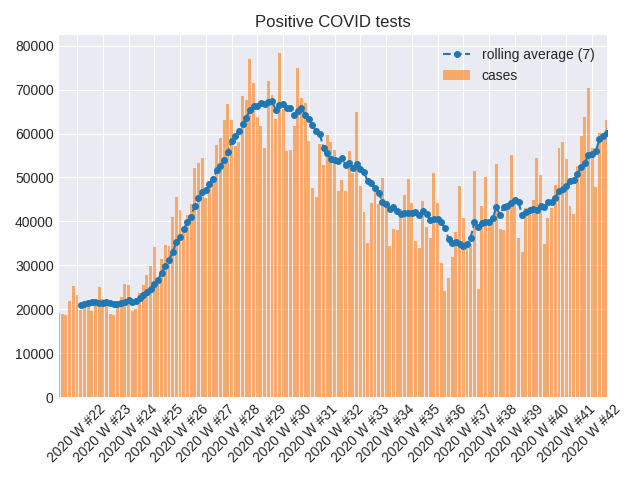

In [16]:
ecdc.plot_country('US', log=LOG_PLOT,ndays=150, roll_days=7);


# Germany

<IPython.core.display.Javascript object>


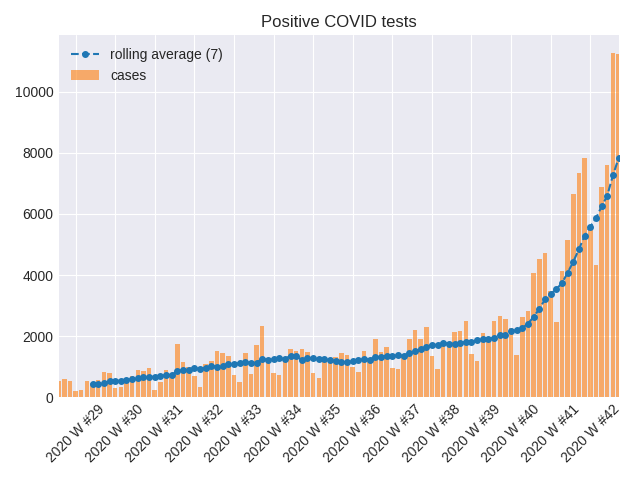

In [28]:
ecdc.plot_country('DE', log=LOG_PLOT,ndays=NDAYS, roll_days=7);

## UK

<IPython.core.display.Javascript object>


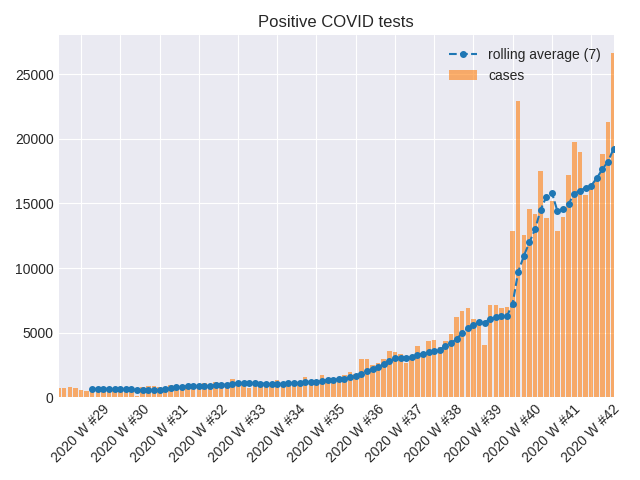

In [18]:
ecdc.plot_country('UK', log=LOG_PLOT,ndays=NDAYS,roll_days=7);

# Commit and Push

In [53]:
%cd Documents/code/covid19/
now = datetime.now()
commit_message = "Last run on " + now.strftime('%Y-%m-%d %H:%M')
commit_message
! echo $commit_message > commit_message.txt
! git add .
! git commit -F commit_message.txt
! git push


[Errno 2] No such file or directory: 'Documents/code/covid19/'
/home/gythaogg/Documents/code/covid19/notebooks
[feature/angular d79cb9f] Last run on 2020-10-21 19:58
 2 files changed, 116 insertions(+), 136 deletions(-)
Enumerating objects: 11, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 16 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 276.41 KiB | 4.61 MiB/s, done.
Total 6 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 4 local objects.
To github.com:gythaogg/covid19.git
   2f73c29..d79cb9f  feature/angular -> feature/angular


In [41]:
! git push --set-upstream origin feature/angular


Branch 'feature/angular' set up to track remote branch 'feature/angular' from 'origin'.
Everything up-to-date
